# dFC

In [136]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [137]:
homedir = os.path.expanduser("~")
workdir = os.path.join(homedir, "Box/CogNeuroLab/Aging Decision Making R01/data/")
os.path.exists(workdir)

True

In [44]:
dt = pd.read_csv(workdir + "mri/rest/dfc/mean_dwell_time.csv")
dt.index = dt['file'].str.split("processed/", expand=True)[1].str.split("_img", expand=True)[0]
dt.index = dt.index.astype(str)
dt = dt.drop('file', axis=1)
dt

,dt_s1,dt_s2,dt_s3,dt_s4,dt_s5
0,,,,,
30004,0.000000,24.750000,29.000000,0.0,6.0
30008,9.000000,9.500000,24.166667,0.0,0.0
30009,24.000000,0.000000,19.000000,0.0,43.0
30012,19.000000,32.333333,15.000000,0.0,0.0
30015,47.333333,10.000000,14.500000,0.0,14.5
...,...,...,...,...,...
40773,7.000000,12.750000,21.500000,24.5,10.0
40777,12.000000,48.666667,20.000000,0.0,0.0
40782,0.000000,8.000000,20.333333,23.0,29.5


In [41]:
act = pd.read_csv(workdir + "actigraphy/circadian_measures/7_days/cr_7days.csv")
act = act.set_index('record_id')
act.index = act.index.astype(str)
act = act.loc[:, ~act.columns.str.contains('^Unnamed')]
act

,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,fact,fnlrgact
record_id,,,,,,,,,,,,
40768,1.327909,5.262666,15.921573,0.581143,1.245098,9.547039,22.296107,-0.097894,0.531211,0.297279,2207.847464,303.912089
30403,1.793479,11.030749,13.967678,0.000000,0.896739,4.406224,23.529131,-0.803043,0.796788,0.298290,2218.547972,1445.744950
40773,1.701935,6.313446,14.968212,0.029421,0.880389,7.188163,22.748260,-0.449329,0.648337,0.457301,4372.467197,1179.820592
30242,1.346082,8.572728,18.967792,0.266425,0.939466,12.251618,25.683965,-0.186396,0.559681,0.339740,2685.467417,696.984716
30584,1.920344,7.730889,17.752176,0.000000,0.960172,9.445765,26.058586,-0.567787,0.692201,0.550293,6349.631633,2156.924640
...,...,...,...,...,...,...,...,...,...,...,...,...
30095,1.579977,9.358037,17.126207,0.117707,0.907696,9.812011,24.440404,-0.337306,0.609516,0.462228,4485.860656,1171.168423
40653,1.768435,9.227050,13.976995,0.037960,0.922178,5.045540,22.908450,-0.694303,0.744288,0.401769,3484.912618,2287.671496
40758,1.305116,194.804102,15.130947,0.159567,0.812125,6.898319,23.363575,-0.551781,0.686052,0.383081,3222.157416,1281.090194


In [67]:
nact = pd.read_csv(workdir + "actigraphy/circadian_measures/7_days/nparact_7days.csv")
nact = nact.set_index('record_id')
nact.index = nact.index.astype(str)
nact

,IS,IV,RA,L5,L5_starttime,M10,M10_starttime
record_id,,,,,,,
30003,0.38,1.29,0.89,14.10,00:51:30,246.14,12:34:30
30004,0.43,0.57,0.85,12.61,19:54:30,156.15,05:17:30
30008,0.48,0.68,0.90,7.56,20:26:30,147.40,02:00:30
30009,0.42,1.31,0.92,11.58,19:34:30,286.35,06:21:30
30019,0.45,0.71,0.94,4.67,20:08:30,145.78,06:16:30
...,...,...,...,...,...,...,...
40825,0.33,1.02,0.69,12.10,20:04:00,66.25,02:49:00
40855,0.58,1.27,0.91,6.16,18:36:30,135.32,02:37:30
40861,0.33,1.33,0.59,26.04,15:42:30,102.37,00:49:30


In [68]:
d = dt.join(act).join(nact)
d['Group'] = np.where(d.index.str.startswith('3'), 'Young Adults', 'Older Adults')
d

,dt_s1,dt_s2,dt_s3,dt_s4,dt_s5,actamp,actbeta,actphi,actmin,actmesor,...,fact,fnlrgact,IS,IV,RA,L5,L5_starttime,M10,M10_starttime,Group
0,,,,,,,,,,,,,,,,,,,,,
30004,0.000000,24.750000,29.000000,0.0,6.0,1.630892,4.438790,15.128163,0.000000,0.815446,...,2129.737297,658.200891,0.43,0.57,0.85,12.61,19:54:30,156.15,05:17:30,Young Adults
30008,9.000000,9.500000,24.166667,0.0,0.0,1.610484,7.306045,15.569911,0.139627,0.944868,...,3702.068703,1419.752166,0.48,0.68,0.90,7.56,20:26:30,147.40,02:00:30,Young Adults
30009,24.000000,0.000000,19.000000,0.0,43.0,1.951245,7.026165,14.377649,0.081641,1.057264,...,4721.063908,1851.748832,0.42,1.31,0.92,11.58,19:34:30,286.35,06:21:30,Young Adults
30012,19.000000,32.333333,15.000000,0.0,0.0,1.634365,11.913063,15.484577,0.248477,1.065659,...,4007.823819,1266.999569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Young Adults
30015,47.333333,10.000000,14.500000,0.0,14.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Young Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40773,7.000000,12.750000,21.500000,24.5,10.0,1.701935,6.313446,14.968212,0.029421,0.880389,...,4372.467197,1179.820592,0.56,0.79,0.96,3.00,19:44:30,148.30,02:58:30,Older Adults
40777,12.000000,48.666667,20.000000,0.0,0.0,1.129945,26.210610,10.538072,0.155596,0.720569,...,2237.270149,858.936825,0.45,0.83,0.90,4.43,15:21:30,85.63,02:39:30,Older Adults
40782,0.000000,8.000000,20.333333,23.0,29.5,1.867222,9.777417,15.684797,0.124823,1.058434,...,8033.200163,2232.928510,0.71,0.68,0.92,8.15,20:16:30,202.45,02:44:30,Older Adults


In [129]:
do = d
d = d[d['dt_s4'] < 150]

## Rhythm amplitude and dwell time

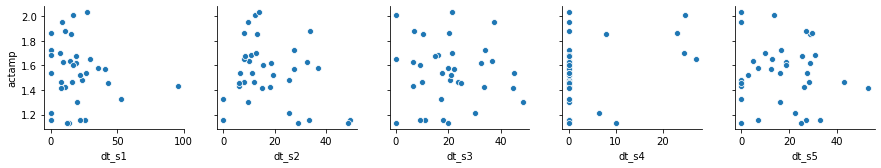

In [153]:
sns.pairplot(d[d['Group'] == 'Older Adults'], kind = 'scatter', x_vars = ['dt_s1', 'dt_s2', 'dt_s3', 'dt_s4', 'dt_s5'] , y_vars = ['actamp'], palette = 'Set1')


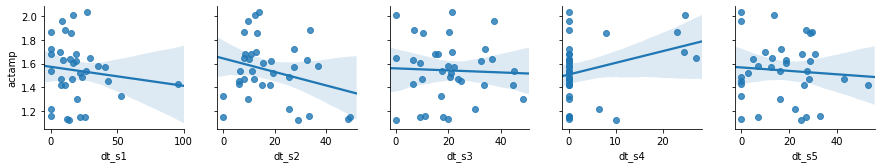

In [154]:
sns.pairplot(d[d['Group'] == 'Older Adults'], kind = 'reg', x_vars = ['dt_s1', 'dt_s2', 'dt_s3', 'dt_s4', 'dt_s5'] , y_vars = ['actamp'], palette = 'Set1')


In [155]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s2 ~ actamp', data=d[d['Group'] == 'Older Adults']).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s2   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.855
Date:                Tue, 18 Aug 2020   Prob (F-statistic):              0.101
Time:                        16:57:51   Log-Likelihood:                -136.11
No. Observations:                  35   AIC:                             276.2
Df Residuals:                      33   BIC:                             279.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.4495     12.964      3.043      0.005      13.073      65.826
actamp       -14.0203      8.298     -1.690      0.101     -30.903       2.862
==============================================================================
Omnibus:                        1.524   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.243
Skew:                           0.451   Prob(JB):                        0.537
Kurtosis:                       2.804   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exploratory Analysis

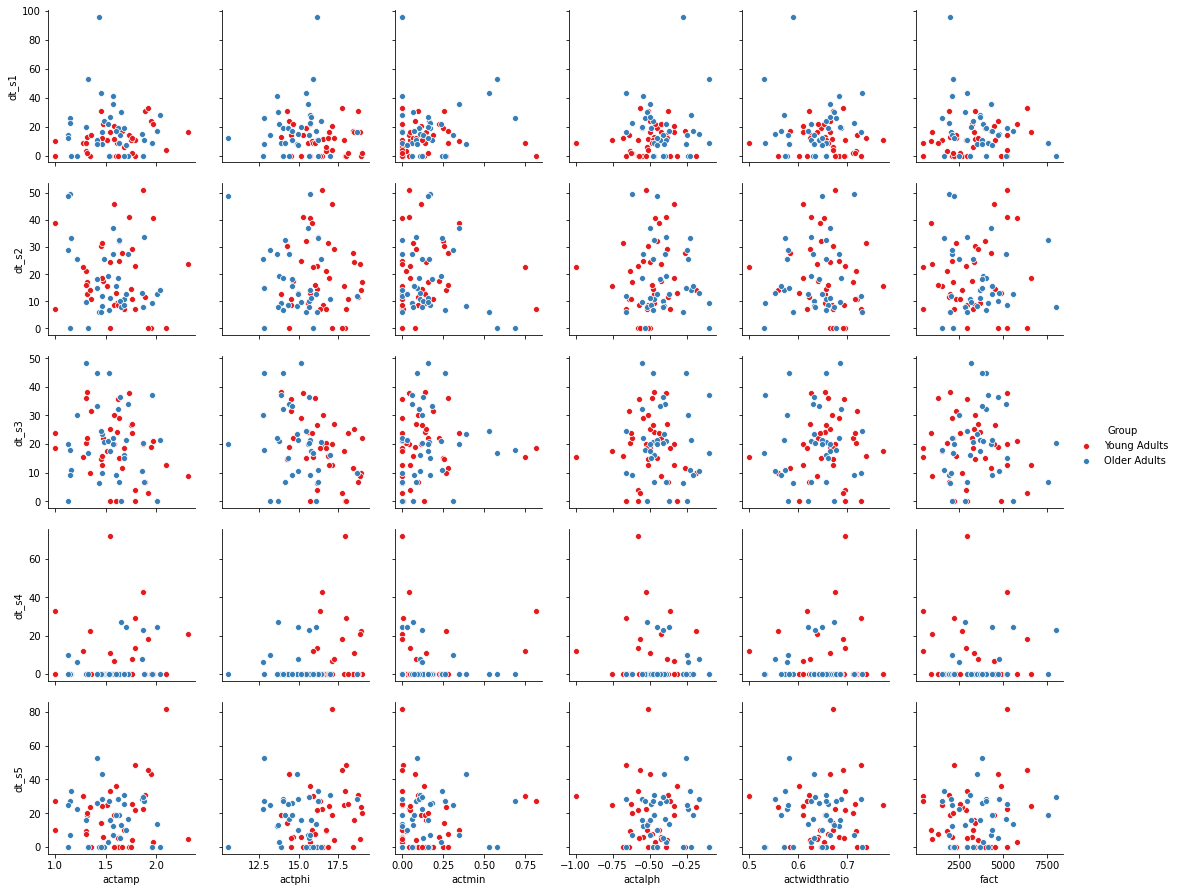

In [130]:
sns.pairplot(d, hue = 'Group', kind = 'scatter', x_vars = ['actamp', 'actphi', 'actmin', 'actalph', 'actwidthratio', 'fact'], y_vars = ['dt_s1', 'dt_s2', 'dt_s3', 'dt_s4', 'dt_s5'], palette = 'Set1')


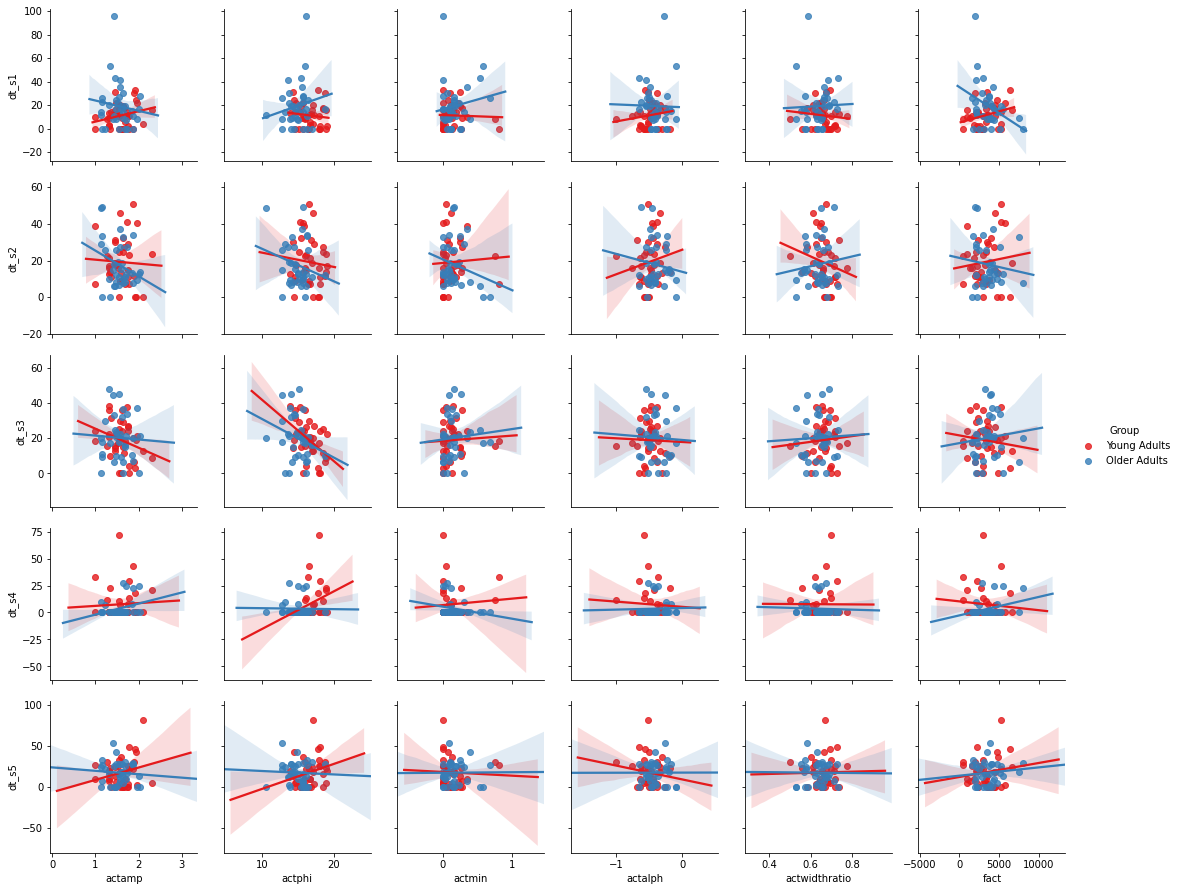

In [131]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['actamp', 'actphi', 'actmin', 'actalph', 'actwidthratio', 'fact'], y_vars = ['dt_s1', 'dt_s2', 'dt_s3', 'dt_s4', 'dt_s5'], palette = 'Set1')


## Correlation Plot All Subjects

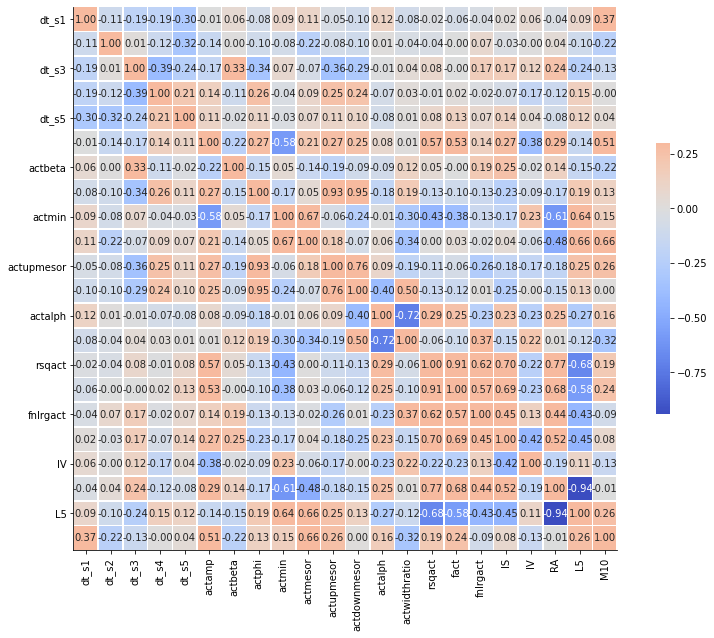

In [132]:
corr = d.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

## Correlation Plot Young Adults

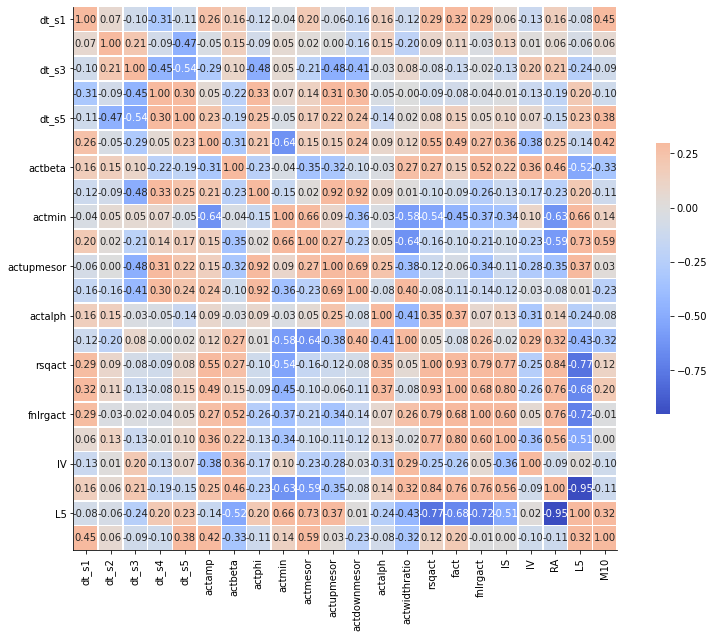

In [133]:
corr = d[d['Group'] == 'Young Adults'].corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

## Correlation Plot Older Adults

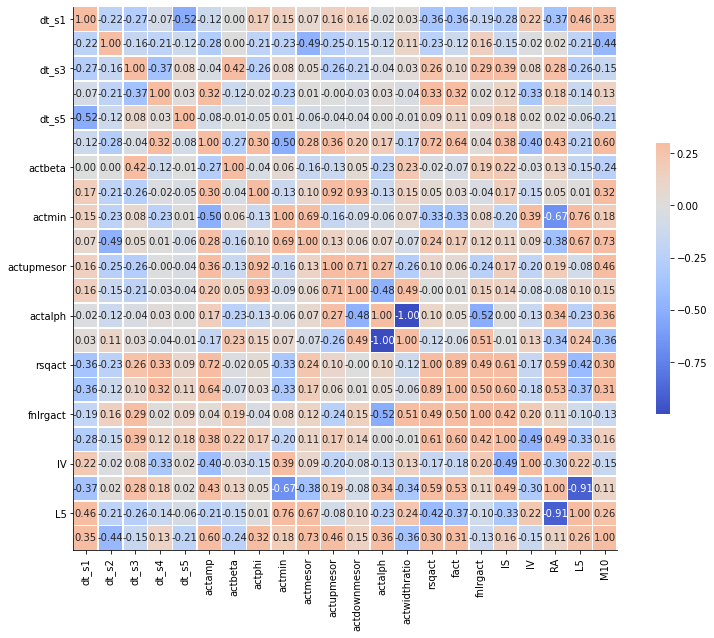

In [134]:
corr = d[d['Group'] == 'Older Adults'].corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

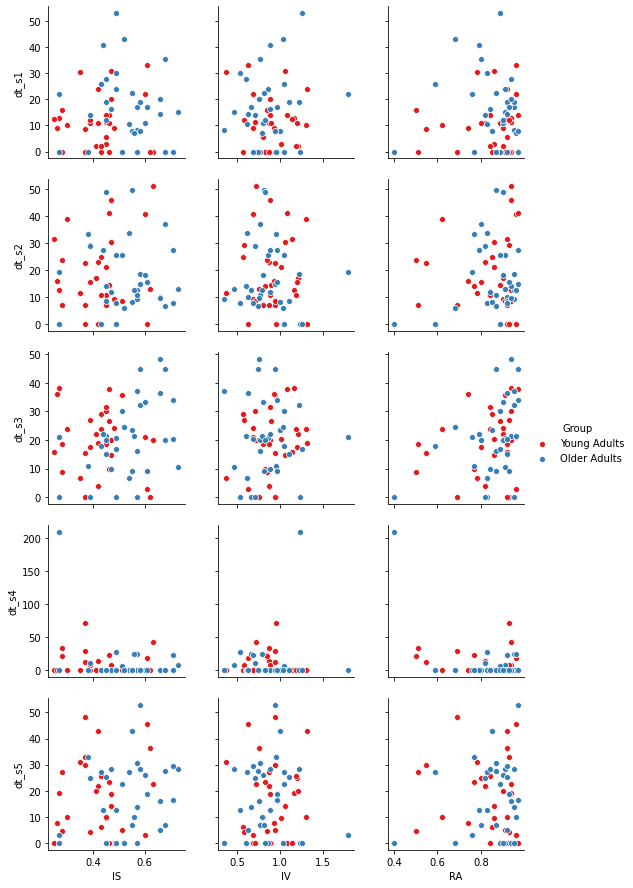

In [73]:
sns.pairplot(d, hue = 'Group', kind = 'scatter', x_vars = ['IS', 'IV', 'RA'], y_vars = ['dt_s1', 'dt_s2', 'dt_s3', 'dt_s4', 'dt_s5'], palette = 'Set1')


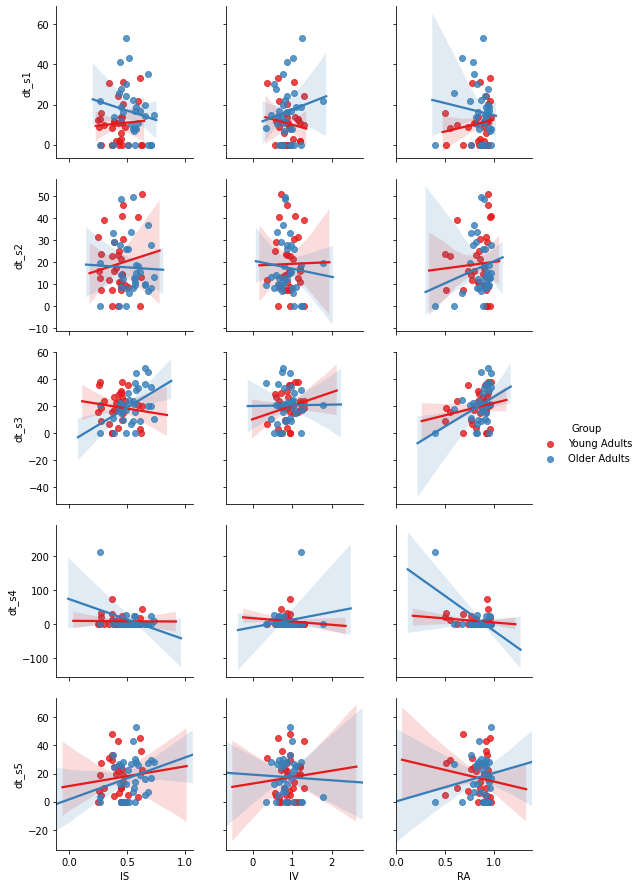

In [70]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['IS', 'IV', 'RA'], y_vars = ['dt_s1', 'dt_s2', 'dt_s3', 'dt_s4', 'dt_s5'], palette = 'Set1')
sns.

## Filtering by DMN states (2 and 5)

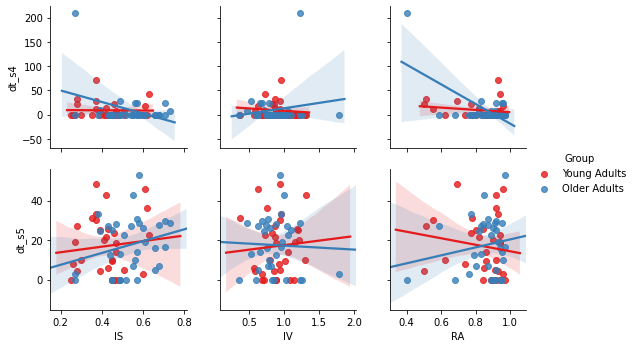

In [128]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['IS', 'IV', 'RA'], y_vars = ['dt_s4', 'dt_s5'], palette = 'Set1')


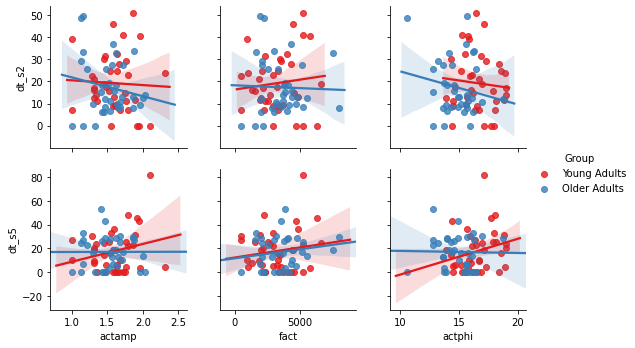

In [76]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['actamp', 'fact', 'actphi'], y_vars = ['dt_s1', 'dt_s5'], palette = 'Set1')


## State 3 Dwell Time and Acrophase

In [113]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s3 ~ Group + actphi + Group:actphi', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s3   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     3.280
Date:                Tue, 18 Aug 2020   Prob (F-statistic):             0.0259
Time:                        16:01:07   Log-Likelihood:                -281.77
No. Observations:                  74   AIC:                             571.5
Df Residuals:                      70   BIC:                             580.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       47.5230     18.875      2.518      0.014       9.879      85.167
Group[T.Young Adults]           28.9557     28.250      1.025      0.309     -27.388      85.299
actphi                          -1.8767      1.268     -1.480      0.143      -4.406       0.653
Group[T.Young Adults]:actphi    -1.5957      1.790     -0.891      0.376      -5.166       1.975
==============================================================================
Omnibus:                        0.181   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.133
Skew:                           0.097   Prob(JB):                        0.936
Kurtosis:                       2.925   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s3 ~ Group + actphi', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s3   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     4.536
Date:                Tue, 18 Aug 2020   Prob (F-statistic):             0.0140
Time:                        16:01:32   Log-Likelihood:                -282.19
No. Observations:                  74   AIC:                             570.4
Df Residuals:                      71   BIC:                             577.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                59.3845     13.366      4.443      0.000      32.733      86.036
Group[T.Young Adults]     3.9207      3.045      1.288      0.202      -2.150       9.991
actphi                   -2.6776      0.894     -2.996      0.004      -4.460      -0.896
==============================================================================
Omnibus:                        0.064   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.028
Skew:                           0.032   Prob(JB):                        0.986
Kurtosis:                       2.930   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## States 3 and 4 Dwell Time and Interdaily Stability

In [119]:
model = smf.ols(formula='dt_s3 ~ Group + IS + Group:IS', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s3   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     3.064
Date:                Tue, 18 Aug 2020   Prob (F-statistic):             0.0346
Time:                        16:04:26   Log-Likelihood:                -249.53
No. Observations:                  65   AIC:                             507.1
Df Residuals:                      61   BIC:                             515.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -7.0381      9.665     -0.728      0.469     -26.365      12.289
Group[T.Young Adults]       32.3153     13.141      2.459      0.017       6.038      58.593
IS                          51.7759     17.712      2.923      0.005      16.359      87.192
Group[T.Young Adults]:IS   -65.7298     27.051     -2.430      0.018    -119.821     -11.639
==============================================================================
Omnibus:                        3.198   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                1.821
Skew:                          -0.121   Prob(JB):                        0.402
Kurtosis:                       2.216   Cond. No.                         29.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
model = smf.ols(formula='dt_s4 ~ Group + IS + Group:IS', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s4   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.710
Date:                Tue, 18 Aug 2020   Prob (F-statistic):             0.0528
Time:                        16:04:41   Log-Likelihood:                -305.22
No. Observations:                  65   AIC:                             618.4
Df Residuals:                      61   BIC:                             627.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   73.4183     22.766      3.225      0.002      27.895     118.942
Group[T.Young Adults]      -63.7536     30.954     -2.060      0.044    -125.650      -1.858
IS                        -118.6288     41.719     -2.843      0.006    -202.052     -35.206
Group[T.Young Adults]:IS   116.4457     63.717      1.828      0.073     -10.965     243.856
==============================================================================
Omnibus:                       91.870   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1622.126
Skew:                           4.142   Prob(JB):                         0.00
Kurtosis:                      26.028   Cond. No.                         29.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
model = smf.ols(formula='dt_s4 ~ Group + IS', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s4   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2.307
Date:                Tue, 18 Aug 2020   Prob (F-statistic):              0.108
Time:                        16:04:55   Log-Likelihood:                -306.95
No. Observations:                  65   AIC:                             619.9
Df Residuals:                      62   BIC:                             626.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                46.7787     17.814      2.626      0.011      11.168      82.389
Group[T.Young Adults]    -8.9241      7.760     -1.150      0.255     -24.436       6.588
IS                      -68.7079     32.123     -2.139      0.036    -132.920      -4.496
==============================================================================
Omnibus:                      102.482   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2412.290
Skew:                           4.798   Prob(JB):                         0.00
Kurtosis:                      31.260   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## States 3 and 4 Dwell Time and Relative Amplitude

In [116]:
model = smf.ols(formula='dt_s3 ~ Group + RA + Group:RA', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s3   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.549
Date:                Tue, 18 Aug 2020   Prob (F-statistic):             0.0640
Time:                        16:02:53   Log-Likelihood:                -250.25
No. Observations:                  65   AIC:                             508.5
Df Residuals:                      61   BIC:                             517.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -16.9541     15.232     -1.113      0.270     -47.412      13.504
Group[T.Young Adults]       21.2008     20.362      1.041      0.302     -19.515      61.917
RA                          43.7965     17.607      2.487      0.016       8.588      79.005
Group[T.Young Adults]:RA   -25.7592     23.745     -1.085      0.282     -73.241      21.722
==============================================================================
Omnibus:                        0.738   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.786
Skew:                          -0.075   Prob(JB):                        0.675
Kurtosis:                       2.483   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
model = smf.ols(formula='dt_s3 ~ Group + RA', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s3   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3.226
Date:                Tue, 18 Aug 2020   Prob (F-statistic):             0.0465
Time:                        16:03:17   Log-Likelihood:                -250.87
No. Observations:                  65   AIC:                             507.7
Df Residuals:                      62   BIC:                             514.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.8121     10.346     -0.465      0.643     -25.494      15.870
Group[T.Young Adults]    -0.6598      2.925     -0.226      0.822      -6.507       5.188
RA                       29.6329     11.830      2.505      0.015       5.985      53.281
==============================================================================
Omnibus:                        0.470   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.607
Skew:                          -0.036   Prob(JB):                        0.738
Kurtosis:                       2.532   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
model = smf.ols(formula='dt_s4 ~ Group + RA + Group:RA', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s4   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     11.48
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           4.56e-06
Time:                        16:03:36   Log-Likelihood:                -294.73
No. Observations:                  65   AIC:                             597.5
Df Residuals:                      61   BIC:                             606.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  184.1844     30.195      6.100      0.000     123.806     244.562
Group[T.Young Adults]     -155.7394     40.364     -3.858      0.000    -236.452     -75.027
RA                        -203.0517     34.903     -5.818      0.000    -272.845    -133.258
Group[T.Young Adults]:RA   179.5405     47.070      3.814      0.000      85.418     273.663
==============================================================================
Omnibus:                       40.392   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.523
Skew:                           1.633   Prob(JB):                     1.90e-41
Kurtosis:                      10.653   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
model = smf.ols(formula='dt_s5 ~ Group + actamp', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s5   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7071
Date:                Tue, 18 Aug 2020   Prob (F-statistic):              0.497
Time:                        15:57:53   Log-Likelihood:                -307.62
No. Observations:                  74   AIC:                             621.2
Df Residuals:                      71   BIC:                             628.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.6484     10.845      0.429      0.669     -16.975      26.272
Group[T.Young Adults]     0.1134      3.706      0.031      0.976      -7.276       7.503
actamp                    8.0799      6.888      1.173      0.245      -5.654      21.814
==============================================================================
Omnibus:                       15.986   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.751
Skew:                           0.977   Prob(JB):                     5.14e-05
Kurtosis:                       4.608   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
model = smf.ols(formula='dt_s1 ~ Group + fact + Group:fact', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     3.712
Date:                Tue, 18 Aug 2020   Prob (F-statistic):             0.0154
Time:                        15:55:49   Log-Likelihood:                -299.24
No. Observations:                  74   AIC:                             606.5
Df Residuals:                      70   BIC:                             615.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     30.2757      5.949      5.089      0.000      18.411      42.140
Group[T.Young Adults]        -25.0835      7.957     -3.152      0.002     -40.954      -9.213
fact                          -0.0032      0.002     -2.125      0.037      -0.006      -0.000
Group[T.Young Adults]:fact     0.0052      0.002      2.425      0.018       0.001       0.009
==============================================================================
Omnibus:                       48.663   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.418
Skew:                           1.852   Prob(JB):                     1.14e-54
Kurtosis:                      11.176   Cond. No.                     2.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
model = smf.ols(formula='dt_s5 ~ Group + fact + Group:fact', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s5   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.6317
Date:                Tue, 18 Aug 2020   Prob (F-statistic):              0.597
Time:                        15:58:19   Log-Likelihood:                -307.36
No. Observations:                  74   AIC:                             622.7
Df Residuals:                      70   BIC:                             631.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     11.5859      6.638      1.745      0.085      -1.654      24.826
Group[T.Young Adults]          0.6282      8.880      0.071      0.944     -17.082      18.339
fact                           0.0015      0.002      0.887      0.378      -0.002       0.005
Group[T.Young Adults]:fact     0.0002      0.002      0.079      0.938      -0.005       0.005
==============================================================================
Omnibus:                       17.573   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.869
Skew:                           1.034   Prob(JB):                     1.08e-05
Kurtosis:                       4.772   Cond. No.                     2.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
model = smf.ols(formula='dt_s5 ~ Group + fact', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s5   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9578
Date:                Tue, 18 Aug 2020   Prob (F-statistic):              0.389
Time:                        15:58:36   Log-Likelihood:                -307.36
No. Observations:                  74   AIC:                             620.7
Df Residuals:                      71   BIC:                             627.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.2408      4.947      2.272      0.026       1.376      21.106
Group[T.Young Adults]     1.2631      3.679      0.343      0.732      -6.073       8.599
fact                      0.0016      0.001      1.370      0.175      -0.001       0.004
==============================================================================
Omnibus:                       17.897   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.534
Skew:                           1.046   Prob(JB):                     7.76e-06
Kurtosis:                       4.806   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
model = smf.ols(formula='dt_s1 ~ Group + actphi + Group:actphi', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.340
Date:                Tue, 18 Aug 2020   Prob (F-statistic):             0.0808
Time:                        15:56:46   Log-Likelihood:                -301.17
No. Observations:                  74   AIC:                             610.3
Df Residuals:                      70   BIC:                             619.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -16.6611     24.530     -0.679      0.499     -65.585      32.263
Group[T.Young Adults]           40.7260     36.716      1.109      0.271     -32.501     113.953
actphi                           2.3864      1.648      1.448      0.152      -0.901       5.674
Group[T.Young Adults]:actphi    -3.1547      2.327     -1.356      0.179      -7.795       1.486
==============================================================================
Omnibus:                       51.450   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.616
Skew:                           2.024   Prob(JB):                     3.80e-55
Kurtosis:                      11.055   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
model = smf.ols(formula='dt_s1 ~ Group + actphi', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.560
Date:                Tue, 18 Aug 2020   Prob (F-statistic):             0.0844
Time:                        15:58:53   Log-Likelihood:                -302.13
No. Observations:                  74   AIC:                             610.3
Df Residuals:                      71   BIC:                             617.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.7885     17.499      0.388      0.699     -28.104      41.681
Group[T.Young Adults]    -8.7669      3.986     -2.199      0.031     -16.715      -0.819
actphi                    0.8029      1.170      0.686      0.495      -1.530       3.136
==============================================================================
Omnibus:                       54.527   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.382
Skew:                           2.144   Prob(JB):                     3.94e-63
Kurtosis:                      11.650   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
model = smf.ols(formula='dt_s5 ~ Group + actphi + Group:actphi', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s5   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9826
Date:                Tue, 18 Aug 2020   Prob (F-statistic):              0.406
Time:                        15:56:56   Log-Likelihood:                -306.82
No. Observations:                  74   AIC:                             621.6
Df Residuals:                      70   BIC:                             630.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       19.5451     26.478      0.738      0.463     -33.263      72.353
Group[T.Young Adults]          -51.8664     39.630     -1.309      0.195    -130.907      27.174
actphi                          -0.1725      1.779     -0.097      0.923      -3.721       3.376
Group[T.Young Adults]:actphi     3.1906      2.511      1.271      0.208      -1.818       8.199
==============================================================================
Omnibus:                       21.801   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.489
Skew:                           1.158   Prob(JB):                     5.35e-08
Kurtosis:                       5.344   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
model = smf.ols(formula='dt_s5 ~ Group + actphi', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s5   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.6610
Date:                Tue, 18 Aug 2020   Prob (F-statistic):              0.519
Time:                        15:59:10   Log-Likelihood:                -307.66
No. Observations:                  74   AIC:                             621.3
Df Residuals:                      71   BIC:                             628.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.1717     18.859     -0.221      0.826     -41.776      33.432
Group[T.Young Adults]    -1.8097      4.296     -0.421      0.675     -10.375       6.756
actphi                    1.4290      1.261      1.133      0.261      -1.085       3.943
==============================================================================
Omnibus:                       22.542   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.400
Skew:                           1.185   Prob(JB):                     2.06e-08
Kurtosis:                       5.422   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Number of Transitions

In [144]:
nt = pd.read_csv(workdir + 'mri/rest/dfc/num_transitions.csv')
nt.index = nt['file'].str.split("processed/", expand=True)[1].str.split("_img", expand=True)[0]
nt.index = nt.index.astype(str)
nt = nt.drop('file', axis=1)
nt

,n_transitions
0,
30004,10
30008,12
30009,8
30012,9
30015,7
...,...
40773,14
40777,6
40782,8


In [146]:
d = d.join(nt)

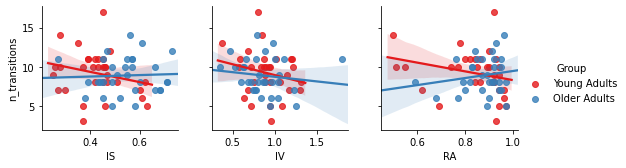

In [147]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['IS', 'IV', 'RA'], y_vars = ['n_transitions'], palette = 'Set1')


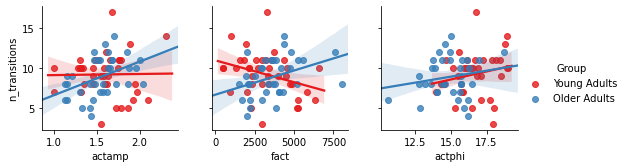

In [148]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['actamp', 'fact', 'actphi'], y_vars = ['n_transitions'], palette = 'Set1')


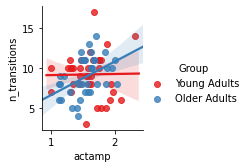

In [149]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['actamp'], y_vars = ['n_transitions'], palette = 'Set1')
